In [1]:
import cv2
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def _pick(L, ty, path):
    L_ = [cv2.imread(os.path.join(path, i)) for i in L if i.split('_')[0]==ty]
    return L_


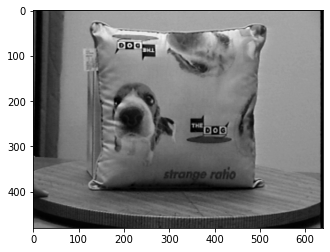

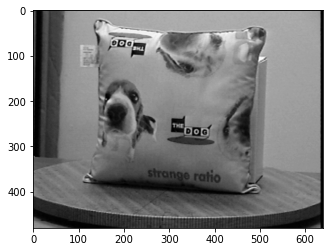

In [3]:
path = '../img'
img_ty = 'Pillow'
IMG_L = _pick(os.listdir(path), img_ty, path)
# (u,v) = optical_flow(IMG_L[0], IMG_L[1], 16, tau=1e-2)

img_shape = IMG_L[1].shape[:2]
prev_image_gray = cv2.cvtColor(IMG_L[0], cv2.COLOR_BGR2GRAY)
current_image_gray = cv2.cvtColor(IMG_L[1], cv2.COLOR_BGR2GRAY)


fig1 = plt.figure()
plt.imshow(prev_image_gray, 'gray')

fig1 = plt.figure()
plt.imshow(current_image_gray, 'gray')



In [4]:
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)

In [5]:
pt_x, pt_y = 220, 240
lk_params = dict( winSize  = (15, 15),
                    maxLevel = 3,
                    criteria = (cv2.TERM_CRITERIA_COUNT, 1, 0.03))

def _LKflow(pre_img, nxt_img, pt_x, pt_y, lk_params):
    p0 = np.array([[pt_x, pt_y]]).astype(np.float32)
    i = 0
    PX, PY = [pt_x], [pt_y]
    XL, YL = [], []
    ep = 1e3
    while ep>1e-2:
        if i==0:
            p1, _, _ = cv2.calcOpticalFlowPyrLK(pre_img, nxt_img, p0, None, **lk_params)
        else:
            p1, _, _ = cv2.calcOpticalFlowPyrLK(pre_img, nxt_img, p0, p1, flags=cv2.OPTFLOW_USE_INITIAL_FLOW, **lk_params)
            
        PX.append(p1[0][0])
        PY.append(p1[0][1])
        XL.append(PX[i] - PX[i+1])
        YL.append(PY[i] - PY[i+1])

        if i>0:
            ep = np.sum(np.abs(XL[i-1] - XL[i])) + np.sum(np.abs(YL[i-1] - YL[i])) 
  
        print('iter:{}, ep:{}\nu = {:.4f}, v = {:.4f}'.format(i, ep, XL[i], YL[i]))
        print('x = {:.4f}, y = {:.4f}'.format(PX[i+1], PY[i+1]))
        print('======================')    
        i+=1    
    return PX, PY 

PX, PY = _LKflow(prev_image_gray, current_image_gray, pt_x, pt_y, lk_params)
        

iter:0, ep:1000.0
u = 29.4776, v = -20.9761
x = 190.5224, y = 260.9761
iter:1, ep:59.8524169921875
u = 6.1219, v = 15.5205
x = 184.4005, y = 245.4556
iter:2, ep:7.1551513671875
u = 0.2908, v = 14.1964
x = 184.1096, y = 231.2592
iter:3, ep:14.264739990234375
u = -0.1339, v = 0.3564
x = 184.2435, y = 230.9028
iter:4, ep:0.484130859375
u = -0.0021, v = 0.0041
x = 184.2457, y = 230.8987
iter:5, ep:0.0062255859375
u = 0.0002, v = 0.0002
x = 184.2455, y = 230.8985


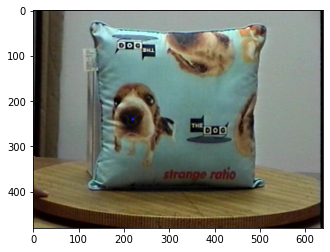

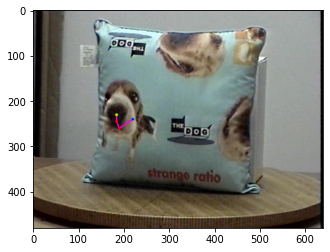

In [6]:
PX = np.array(PX).astype(np.int)
PY = np.array(PY).astype(np.int)

img = cv2.cvtColor(IMG_L[1], cv2.COLOR_BGR2RGB)
img_0 = cv2.cvtColor(IMG_L[0], cv2.COLOR_BGR2RGB)
for j in range(len(PX)):
    if j!=0:
        cv2.line(img, (PX[j-1], PY[j-1]), (PX[j], PY[j]), (250, 5, 216), 2)

for k in range(len(PX)):
    if k==0:
        c = (0, 38, 255)
    elif k==len(PX)-1:
        c = (182, 255, 0)
    else:
        c = (255, 0, 0)
    cv2.circle(img,(PX[k], PY[k]), 3, c, -1)

cv2.circle(img_0,(PX[0], PY[0]), 3, (0, 38, 255), -1)


fig = plt.figure()
plt.imshow(img_0)
plt.show()

fig = plt.figure()
plt.imshow(img)
plt.show()